softmax多分类   

In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
train_image.shape, train_label.shape

((60000, 28, 28), (60000,))

In [4]:
test_image.shape, test_label.shape

((10000, 28, 28), (10000,))

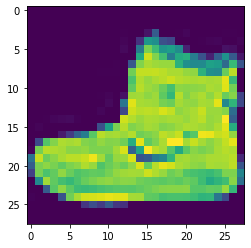

In [5]:
plt.imshow(train_image[0])

In [6]:
np.max(train_image[0])

255

In [7]:
train_label[0]

9

In [8]:
# 归一化
train_image = train_image/255
test_image = test_image/255

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [11]:
model.fit(train_image, train_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5009 - acc: 0.8228

In [12]:
# 用测试数据集上做评价
model.evaluate(test_image, test_label)

313/313 [==============================] - 0s 1ms/step - loss: 0.3805 - acc: 0.8570


[0.38048550486564636, 0.8569999933242798]

In [13]:
# 将train_label做成独热编码
train_label_onthot = tf.keras.utils.to_categorical(train_label)

In [14]:
train_label_onthot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
test_label_onthot = tf.keras.utils.to_categorical(test_label)

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [18]:
model.fit(train_image, train_label_onthot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5295 - acc: 0.8116

In [19]:
predict = model.predict(test_image)

In [20]:
predict.shape

(10000, 10)

In [21]:
np.argmax(predict[0])

9

In [22]:
test_label[0]

9

In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [27]:
history = model.fit(train_image, train_label_onthot,
                    epochs=10,
                    validation_data=(test_image, test_label_onthot))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2278 - acc: 0.9129 - val_loss: 0.3422 - val_acc: 0.8834

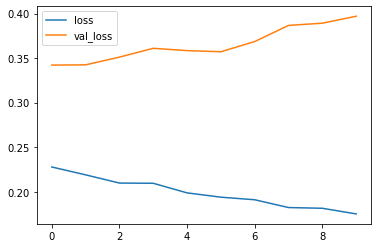

In [29]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

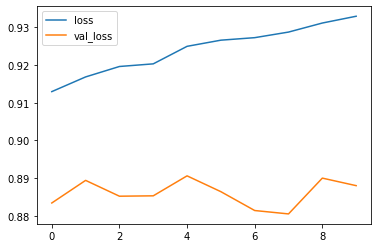

In [30]:
plt.plot(history.epoch, history.history.get('acc'), label='loss')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_loss')
plt.legend()

过拟合
训练数据得分很高，测试数据得分相对较低
使用dropout人为丢弃部分隐藏单元

欠拟合
训练数据得分较低，测试数据得分较低
增加拟合能力：增加隐藏层网络单元，增加网络容量